In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         1168 non-null   object
 1   date            1168 non-null   object
 2   malfunction     1168 non-null   int64 
 3   feature1        1168 non-null   int64 
 4   feature2        1168 non-null   int64 
 5   feature3        1168 non-null   int64 
 6   feature4        1168 non-null   int64 
 7   feature5        1168 non-null   int64 
 8   feature6        1168 non-null   int64 
 9   feature7        1168 non-null   int64 
 10  feature9        1168 non-null   int64 
 11  active          1168 non-null   int64 
 12  month           1168 non-null   int64 
 13  Day_of_week     1168 non-null   int64 
 14  max_date        1168 non-null   object
 15  failure_before  1168 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 146.1+ KB


In [3]:
df.drop(['date','max_date'], axis = 1, inplace = True)
df.nunique()

,0
product,7
malfunction,2
feature1,1168
feature2,102
feature3,43
feature4,55
feature5,58
feature6,1129
feature7,14
feature9,63


In [5]:
scaler = StandardScaler()
num_vars = ['feature1', 'feature2', 'feature6']
df[num_vars] = scaler.fit_transform(df[num_vars])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product         1168 non-null   object 
 1   malfunction     1168 non-null   int64  
 2   feature1        1168 non-null   float64
 3   feature2        1168 non-null   float64
 4   feature3        1168 non-null   int64  
 5   feature4        1168 non-null   int64  
 6   feature5        1168 non-null   int64  
 7   feature6        1168 non-null   float64
 8   feature7        1168 non-null   int64  
 9   feature9        1168 non-null   int64  
 10  active          1168 non-null   int64  
 11  month           1168 non-null   int64  
 12  Day_of_week     1168 non-null   int64  
 13  failure_before  1168 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 127.9+ KB


In [6]:
for col in ['month','Day_of_week', 'feature3', 'feature4', 'feature5', 'feature7', 'feature9']:
  df[col] = df[col].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product         1168 non-null   object 
 1   malfunction     1168 non-null   int64  
 2   feature1        1168 non-null   float64
 3   feature2        1168 non-null   float64
 4   feature3        1168 non-null   object 
 5   feature4        1168 non-null   object 
 6   feature5        1168 non-null   object 
 7   feature6        1168 non-null   float64
 8   feature7        1168 non-null   object 
 9   feature9        1168 non-null   object 
 10  active          1168 non-null   int64  
 11  month           1168 non-null   object 
 12  Day_of_week     1168 non-null   object 
 13  failure_before  1168 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 127.9+ KB


In [7]:
df = pd.get_dummies(df, drop_first = True)
df.shape

(1168, 254)

In [8]:
print(df.shape)
df['malfunction'].value_counts()

(1168, 254)


,count
malfunction,
0,1161
1,7


In [9]:
X = df.drop('malfunction', axis = 1)
Y = df['malfunction']      #target

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(len(X_train), len(X_test))

934 234


In [162]:
def model(k):

  knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  knn.fit(X_train, Y_train)
  pred = knn.predict(X_train)
  preds = knn.predict(X_test)
  return pred, preds

In [168]:
y_pred, y_preds = model(5)

In [169]:
print ("Train Accuracy=", round(accuracy_score(Y_train, y_pred), 6))

Train Accuracy= 0.995717


In [170]:
print("Test Accuracy=", round(accuracy_score(Y_test, y_preds), 6))

Test Accuracy= 0.995726


In [171]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       0.00      0.00      0.00         1

    accuracy                           1.00       234
   macro avg       0.50      0.50      0.50       234
weighted avg       0.99      1.00      0.99       234



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [172]:
cm = confusion_matrix(Y_test, y_preds)
print(cm)

[[233   0]
 [  1   0]]


Text(50.722222222222214, 0.5, 'True labels')

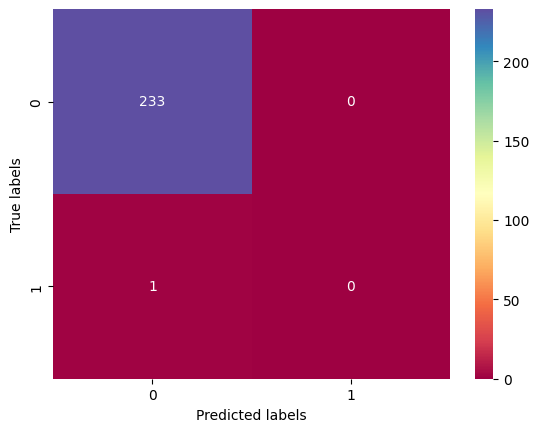

In [176]:
sns.heatmap(cm, annot = True, fmt = "d", cmap = 'Spectral')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')